<a href="https://colab.research.google.com/github/kwambokar/msc-dsa-module5-tuda/blob/main/Sentiment%20and%20Social%20Network%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import necessary packages

In [ ]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import datatable as dt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import re
import plotly.graph_objects as go

# Reading data

We read in the CSV file we extracted from *Meltwater* using the `fread()` method - from the 'datatable' or 'dt' module -  and convert it to a pandas dataframe using the `to_pandas()` method.

The `fread` method is used to read in data from various sources, including CSV, TSV, and other flat files, and create a 'datatable' object. The 'datatable' object is similar to a pandas DataFrame, but optimized for handling large datasets with efficient memory usage and fast computation.

The `fread` method is known for its speed and efficiency in reading in large datasets, as it uses multi-threading to read the file in parallel, and also automatically detects the data type of each column in the dataset, reducing the amount of memory needed for loading the data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data
df = dt.fread('/content/drive/MyDrive/Module 5/M5_TUDA_Dr Senagi/Uncircumcised_OR_Fumigation_OR_Eliminate_OR_Kill_O - Feb 14, 2023 - 8 29 57 AM.csv').to_pandas()
df

Date Headline  \
0      31-Dec-2022 08:09PM      b''   
1      31-Dec-2022 06:36PM      b''   
2      31-Dec-2022 06:15PM      b''   
3      31-Dec-2022 05:38PM      b''   
4      31-Dec-2022 03:57PM      b''   
...                    ...      ...   
19995  22-Aug-2022 06:50AM      b''   
19996  22-Aug-2022 06:45AM      b''   
19997  22-Aug-2022 06:33AM      b''   
19998  22-Aug-2022 06:12AM      b''   
19999  22-Aug-2022 05:48AM      b''   

                                                                   URL  \
0          http://twitter.com/keru_ronald/statuses/1609235304036331520   
1          http://twitter.com/betty_oburu/statuses/1609211976554618881   
2      http://twitter.com/insomniawarlord/statuses/1609206603395497985   
3      http://twitter.com/Fredric78959307/statuses/1609197212835401730   
4          http://twitter.com/SonOfKisumu/statuses/1609171828928544768   
...                                                                ...   
19995      http://twitter.com/leokenya1_1/statuses/1561561325712580614   
19996     http://twitter.com/BrianneOkoth/statuses/1561560156164526080   
19997    http://twitter.com/KiptooMissile/statuses/1561557250220646401   
19998        http://twitter.com/BwOmoigwa/statuses/1561551750657712129   
19999    http://twitter.com/hamtoshikamwe/statuses/1561545894155124736   

      Opening Text  \
0              b''   
1              b''   
2              b''   
3              b''   
4              b''   
...            ...   
19995          b''   
19996          b''   
19997          b''   
19998          b''   
19999          b''   

                                                                                                                                                                                                                                                                                                      Hit Sentence  \
0                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
1                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
2                                                                                                                            QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody   
3      @NjiruAdv @rigathi @WilliamsRuto Bitterness will kill this Black Bull @NjiruAdv. What did Riggy G and Samoei son of Ruto ever do to you other than beating your candidates, great grandpa @RailaOdinga and grandma @MarthaKarua hands down? Continued barking doesn't add you cleints; Actual working does!   
4                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
...                                                                                                                                                                                                                                                                                                            ...   
19995          RT @MigunaMiguna: THE DESPOT'S CONUNDRUM 1. Despot Uhuru Kenyatta wants to use @mucheru's fake form 34As to have @WilliamsRuto's victory nullified. 2. But they know Ruto will defeat conman @RailaOdinga in fresh ele

In [ ]:
#Make a copy of the dataset
data = df.copy()

# Get a feel of the data

In [ ]:
#number of rows, columns
data.shape

(20000, 37)

In [ ]:
#name of columns
data.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Document Tags'],
      dtype='object')

In [ ]:
#extract first 3 rows
data[:3]

Date Headline  \
0  31-Dec-2022 08:09PM      b''   
1  31-Dec-2022 06:36PM      b''   
2  31-Dec-2022 06:15PM      b''   

                                                               URL  \
0      http://twitter.com/keru_ronald/statuses/1609235304036331520   
1      http://twitter.com/betty_oburu/statuses/1609211976554618881   
2  http://twitter.com/insomniawarlord/statuses/1609206603395497985   

  Opening Text  \
0          b''   
1          b''   
2          b''   

                                                                                                                                                                                                    Hit Sentence  \
0  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
1  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
2                          QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody   

    Source        Influencer  Country Subregion Language  ...  \
0  Twitter      @keru_ronald  Unknown       b''  English  ...   
1  Twitter      @betty_oburu    Kenya       b''  English  ...   
2  Twitter  @insomniawarlord  Unknown       b''  English  ...   

   Twitter Screen Name                        User Profile Url  \
0             Rk Ronny      http://www.twitter.com/keru_ronald   
1          Betty Oburu      http://www.twitter.com/betty_oburu   
2                  a !  http://www.twitter.com/insomniawarlord   

                                                                                                                                                   Twitter Bio  \
0                                                                                                               A just leader is better than abundance of rain   
1  An enthusiastic mother,an avid reader , a  fan of local and international  football, a lover of nature, keeps abreast with global issues and current trends   
2                                                                                          this man is carnage, a man who has given up everything but fighting   

  Twitter Followers Twitter Following Alternate Date Format     Time  \
0             295.0             898.0          Dec 31, 2022  8:09 PM   
1            1369.0            1339.0          Dec 31, 2022  6:36 PM   
2              44.0              64.0          Dec 31, 2022  6:15 PM   

          State     City Document Tags  
0                                  b''  
1  Nairobi Area  Nairobi           b''  
2                                  b''  

[3 rows x 37 columns]

In [ ]:
data['Sentiment']

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
19995    Negative
19996     Neutral
19997    Negative
19998    Negative
19999    Negative
Name: Sentiment, Length: 20000, dtype: object

# Data Cleaning 

In [ ]:
#Rename the columns
data.rename(columns={'Hit Sentence' :'tweet'},inplace=True)
data.rename(columns={'Influencer' :'target'},inplace=True)
data

Date Headline  \
0      31-Dec-2022 08:09PM      b''   
1      31-Dec-2022 06:36PM      b''   
2      31-Dec-2022 06:15PM      b''   
3      31-Dec-2022 05:38PM      b''   
4      31-Dec-2022 03:57PM      b''   
...                    ...      ...   
19995  22-Aug-2022 06:50AM      b''   
19996  22-Aug-2022 06:45AM      b''   
19997  22-Aug-2022 06:33AM      b''   
19998  22-Aug-2022 06:12AM      b''   
19999  22-Aug-2022 05:48AM      b''   

                                                                   URL  \
0          http://twitter.com/keru_ronald/statuses/1609235304036331520   
1          http://twitter.com/betty_oburu/statuses/1609211976554618881   
2      http://twitter.com/insomniawarlord/statuses/1609206603395497985   
3      http://twitter.com/Fredric78959307/statuses/1609197212835401730   
4          http://twitter.com/SonOfKisumu/statuses/1609171828928544768   
...                                                                ...   
19995      http://twitter.com/leokenya1_1/statuses/1561561325712580614   
19996     http://twitter.com/BrianneOkoth/statuses/1561560156164526080   
19997    http://twitter.com/KiptooMissile/statuses/1561557250220646401   
19998        http://twitter.com/BwOmoigwa/statuses/1561551750657712129   
19999    http://twitter.com/hamtoshikamwe/statuses/1561545894155124736   

      Opening Text  \
0              b''   
1              b''   
2              b''   
3              b''   
4              b''   
...            ...   
19995          b''   
19996          b''   
19997          b''   
19998          b''   
19999          b''   

                                                                                                                                                                                                                                                                                                             tweet  \
0                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
1                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
2                                                                                                                            QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody   
3      @NjiruAdv @rigathi @WilliamsRuto Bitterness will kill this Black Bull @NjiruAdv. What did Riggy G and Samoei son of Ruto ever do to you other than beating your candidates, great grandpa @RailaOdinga and grandma @MarthaKarua hands down? Continued barking doesn't add you cleints; Actual working does!   
4                                                                                                    RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY   
...                                                                                                                                                                                                                                                                                                            ...   
19995          RT @MigunaMiguna: THE DESPOT'S CONUNDRUM 1. Despot Uhuru Kenyatta wants to use @mucheru's fake form 34As to have @WilliamsRuto's victory nullified. 2. But they know Ruto will defeat conman @RailaOdinga in fresh ele

# Language Analysis

In [ ]:
data['Language'].value_counts()

English                         19265
Indonesian                        227
Swahili                           193
Uzbek                              89
Cebuano                            75
Vietnamese                         43
Polish                             29
unknown                            25
Estonian                           11
Malay                              11
French                              5
Tagalog                             4
Finnish                             4
Waray (Philippines)                 4
Central Dusun, Kadazan Dusun        3
Turkish                             3
Welsh                               1
Creek                               1
Italian                             1
Breton                              1
Thai                                1
Hungarian                           1
Portuguese                          1
North Moluccan Malay                1
Khasi                               1
Name: Language, dtype: int64

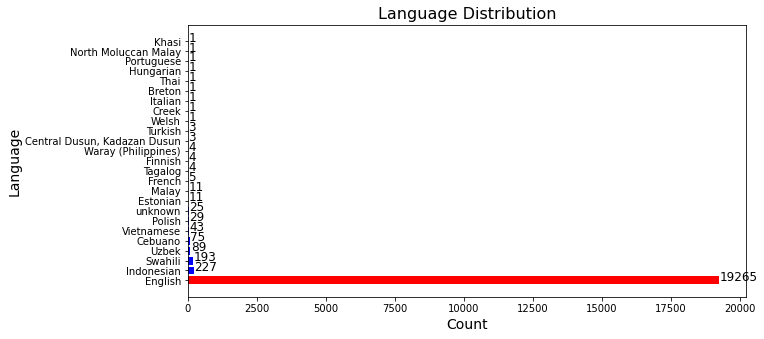

In [ ]:
# create the value counts series
language_counts = data['Language'].value_counts()

# create a list of colors with one color for each language
colors = ['red' if lang == 'English' else 'blue' for lang in language_counts.index]

# plot the counts as a horizontal bar chart with red for English and blue for other languages
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(list(language_counts.index), list(language_counts.values), color=colors)

# add text labels to the bars with the counts displayed next to each bar
for i, v in enumerate(reversed(language_counts.values)):
    ax.text(v + 10, len(language_counts) - i - 1, str(v), color='black', fontsize=12)

# set the chart title and axis labels
plt.title('Language Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Language', fontsize=14)

# show the chart
plt.show()


In [ ]:
#number of original Tweets
original_tweets = data[data["tweet"].str.startswith("RT") == False]
original_tweets = original_tweets[original_tweets["tweet"].str.startswith("QT") == False]
original_tweets.shape

(3492, 37)

In [ ]:
#Number of unique accounts with original tweets
original_tweets['target'].nunique()

2610

In [ ]:
posts=original_tweets['tweet'].value_counts()
posts = pd.DataFrame(posts)
posts.reset_index(inplace=True)
posts.columns=["Message","Count"]
posts.head(20)

Message  \
0                       @shailjapatel In August 1952, Kenyatta told a Kikuyu audience Mau Mau has spoiled the country...Let Mau Mau perish forever. All people should search for Mau Mau and kill it. Kenyatta described the conflict in his memoirs as a civil war rather than a rebellion.   
1                                                                                                                                                                                              President William Ruto: We will work with CRB to eliminate the culture of blacklisting Kenya.   
2                   Winnie Odinga Raila Odinga and Martha Karua appearing in a presser to talk about dictatorship when they said nothing when uhuru weaponized DCI to kill and harass Kenyan's. Standing shoulder to shoulder with Murathe,a KEMSA thief and talking about criminals. Shenzi   
3          President Uhuru Kenyatta says that he will hand over power with a smile but he will recognize the Former PM Raila Odinga as his leader. Pettiness is hard to kill. He should have just said, Ata sijasikia uchungu... All in all, as long as you hand over power, it is all good.   
4                                                            We are pitted against the corruption cartels determined to take control of our government. The cartels are ready to bribe, kill, and compromise systems to get to power. - Former PM Raila Odinga describing himself and Azimio   
5                                                                                                                                    We cannot allow police to shoot and kill recklessly like they have been doing under UHURU’s watch – IPOA tells IG JAPHETH KOOME https://t.co/TzO7wus9PS   
6                                                                                                                                                                                                           President Ruto to eliminate trade barriers laid by Uhuru https://t.co/7xe6HGkDRi   
7                                                                                                           RUTO’s Govt headed for a clash with KOOME’s Judiciary as court limits police from using guns after govt ordered them to shoot and kill criminals – LOOK! https://t.co/JuKTItSwCZ   
8                                          President William Ruto: I want to encourage our farming community to register themselves because going forward our fertiliser subsidy program is going to be dispensed on the internet on e-voucher so that we can eliminate brokers and cartels.   
9   144. Tortures To Kill ACC Appeal: Prayers for Humanitarian Visa, Asylum Protection, Self-Determination and Rule-of-Law from Uhuru, Raila, co-conspirators and their Jinn-Theocracy GoK Sanctioned political-legal abuse, delayed-denied justice, outlawing, e... https://t.co/jYFVen1bqQ   
10                                                                                                              “These corrupt cartels are buying leaders elected on other party tickets to kill democracy. Raila accuses Ruto of planning to cripple multi-partyism https://t.co/eEur5MyIzE   
11   The cartoon series TOM and JERRY ran for 78 years! BABA is 77! For close to 8 decades, did Tom SUCCESSFULLY CATCH & KILL Jerry? Someone PLEASE answer me! If not, then it feels like RAILA ODINGA is TOM and the PRESIDENCY is JERRY! It is ALWAYS doing its best to run away from him!   
12                                                                                      Kenya is a democratic country and all who tried to kill democracy on the 15th of Aug when William Ruto was declared president elect should Resign ASAP. Tuesday 13th should not find them in office.   
13                                                                                                                                                              @Diphiediphie We will be told Ruto is buying people to attend his inauguration, ngoja

In [ ]:
# Quoted Tweets
quoted_tweets = data[data["tweet"].str.startswith("QT") == True]
quoted_tweets

Date Headline  \
2      31-Dec-2022 06:15PM      b''   
6      31-Dec-2022 11:59AM      b''   
10     31-Dec-2022 11:02AM      b''   
17     30-Dec-2022 02:46PM      b''   
32     29-Dec-2022 10:31AM      b''   
...                    ...      ...   
19947  22-Aug-2022 10:29AM      b''   
19951  22-Aug-2022 10:01AM      b''   
19964  22-Aug-2022 08:54AM      b''   
19984  22-Aug-2022 07:43AM      b''   
19996  22-Aug-2022 06:45AM      b''   

                                                                   URL  \
2      http://twitter.com/insomniawarlord/statuses/1609206603395497985   
6         http://twitter.com/NenstOrg2011/statuses/1609111930853105666   
10      http://twitter.com/julius_muiruri/statuses/1609097552753836032   
17              http://twitter.com/ndechd/statuses/1608791542709485568   
32     http://twitter.com/RobertN01599705/statuses/1608365070584807424   
...                                                                ...   
19947        http://twitter.com/joy000011/statuses/1561616469053607936   
19951      http://twitter.com/KamauKaguru/statuses/1561609600184582144   
19964        http://twitter.com/ewaweru40/statuses/1561592618944978945   
19984     http://twitter.com/HildaMuteshi/statuses/1561574842033475585   
19996     http://twitter.com/BrianneOkoth/statuses/1561560156164526080   

      Opening Text  \
2              b''   
6              b''   
10             b''   
17             b''   
32             b''   
...            ...   
19947          b''   
19951          b''   
19964          b''   
19984          b''   
19996          b''   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        tweet  \
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody   
6      QT @Kithinjijoshua6: 😅😂truth will kill you some day ooh 🤣 ; @AmechokaPunda @WaNduta8 @harun_muya @mwithigaP @LariNdiwa @job_pundit @StanleyOpiyo5 @masaaiwaria @NenstOrg2011 @punda_amechoka @allanodera @SGaturusalim @ciaroyalty @JullyGun @RobertOGILLO1 @mwanainchi1 @slmiheso @jwkhasndi @panafriKanguru @mari_mwangi @milliciachris @mauriceoyamo @kong8900 @YMuredhi @MunyuaNduati @emuriithi038 @KiboromoM6 @LichinaL @AgapetusWamalwa @Paperboyrocks @samuelngugikar1 @Dodger

In [ ]:
#Retweeted tweets
retweeted_tweets = data[data["tweet"].str.startswith("RT") == True]
retweeted_tweets.shape

(14982, 37)

In [ ]:
#Number of unique accounts
retweeted_tweets['target'].nunique()

9474

#Sentiment Analysis

In [ ]:
# check unique categories
unique_categories = data['Sentiment'].unique()
unique_categories

array(['Negative', 'Positive', 'Neutral', 'Not Rated'], dtype=object)

In [ ]:
data_sen = data[data['Sentiment'].isin(['Positive', 'Negative', 'Neutral', 'Not Rated'])]
data_sen['Sentiment'].value_counts()

Negative     11089
Neutral       6736
Positive      2172
Not Rated        3
Name: Sentiment, dtype: int64

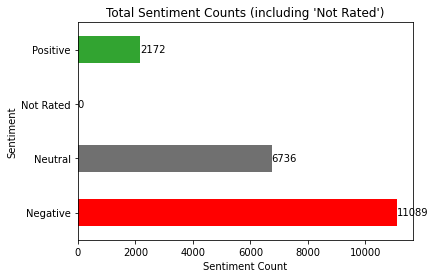

In [ ]:
# Define a list of colors for each category
colors = ["#FF0000", "#707070", "#00FF00", "#32A431"]

# Group the DataFrame by "Sentiment" and count the number of occurrences of each category
sentiment_counts = data.groupby("Sentiment").size()

# Add Not Rated as a category
sentiment_counts['Not Rated'] = data['Sentiment'].isna().sum()

# Create a horizontal bar chart of the count of each category
ax = sentiment_counts.plot(kind="barh", color=colors)

# Add the count of each category on the bars themselves
for i, count in enumerate(sentiment_counts):
    ax.text(count, i, str(count), va="center")

# Set the x-axis label
ax.set_xlabel("Sentiment Count")

# Set the title
ax.set_title("Total Sentiment Counts (including 'Not Rated')")

# Show the plot
plt.show()


In [ ]:
#drop the "Not rated" category as it is insignificant
df2 = data[data["Sentiment"] != "Not Rated"]
df2.shape

(19997, 37)

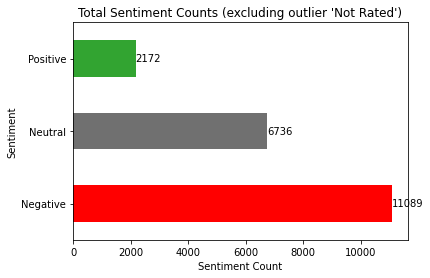

In [ ]:
#plot how it looks like now, having removed the outlier 'Not Rated'

# Define a list of colors for each category
#colors = ["#FF0000", "#00FF00", "#0000FF"]
colors = ["#FF0000", "#707070", "#32A431"]
#red neg, green net, blue pos  #006400
#Positive would be green, neutral blue and negative red.

# Group the DataFrame by "Sentiment" and count the number of occurrences of each category
sentiment_counts = df2.groupby("Sentiment").size()

# Create a horizontal bar chart of the count of each category
ax = sentiment_counts.plot(kind="barh", color=colors)

# Add the count of each category on the bars themselves
for i, count in enumerate(sentiment_counts):
    ax.text(count, i, str(count), va="center")

# Set the x-axis label
ax.set_xlabel("Sentiment Count")

# Set the title
ax.set_title("Total Sentiment Counts (excluding outlier 'Not Rated')")

# Show the plot
plt.show()



## Train model

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#We split the dataset into a training and test set.  
#We'll use the test set later to assess how our model performs
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size = 0.3, random_state=0)

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Cleaning

We write a function that cleans data.  It does this by:

- Removing non-alphabetic characters;
- Lowercasing the corpus;
- Removing stop words; and
- Lemmatizing the corpus.

In [ ]:
import re
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

def preprocess_data(document):
    document = re.sub( "[^a-zA-Z]", " ", document)
    document = document.lower()
    document = re.sub("&lt;/?.*?&gt;",
                      " &lt;&gt; ",
                      document)
    document = " ".join(lemmatizer.lemmatize(word) for word in document.split(" ") if word not in STOPWORDS)
    return document

### Building a Logistic Model for Sentiment Analysis

To build the model, note that we had split the data into a training and test set (70%/30%).  

In the training set, we further split the data into a training and validation set (70%/30%). We shall run the model against the validation set and check whether the paramaters for the Logistic Model are good enough.  

If they are not, we shall conduct hyper-parameter tuning until we get some decent performance before testing our model on the unseen - test - data.  

In [ ]:
pp_list = [preprocess_data(tweet) for tweet in train["tweet"]]

In [ ]:
pp_list[:10]

['rt  makiadi   moi leaving nakuru nairobi announced president afterwards mzee kenyatta died  kiambu mafia  planned use police officer called ngorokos kill around naivasha luckily mistimed found moi already passed',
 'rt  makiadi   moi leaving nakuru nairobi announced president afterwards mzee kenyatta died  kiambu mafia  planned use police officer called ngorokos kill around naivasha luckily mistimed found moi already passed',
 'rt  ahmednasirlaw  used tell kenyan world former president uhuru s government used kill kenyan official governmental policy used think alarmist  jacob juma killed team left office fateful day  know ordered killing ',
 'qt   yanoh  whoever re refer must individual name  two entire community come  non member two community expressed similar sentiment seem firing range    kalenjins kikuyus mad luo governor didn t go church known thief labelled entire tribe watu wa kurusha mawe  begging blood luo  ngojeni ruto akuje kwenu go kiss foot way want ',
 'rt  vr axscncmqc

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(pp_list, train["Sentiment"].values,
                                                  test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vecs = vectorizer.fit_transform(x_train)
val_vecs = vectorizer.transform(x_val)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(train_vecs, y_train)

LogisticRegression()

In [ ]:
predicted = model.predict(val_vecs)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(
    y_val,
    predicted
)

print(cm)

[[2198   88    4]
 [ 203 1241   10]
 [  40   30  386]]


In [ ]:
acc = accuracy_score(
    y_val,
    predicted
)

print(acc)

0.9107142857142857


In [ ]:
print(classification_report(
    y_val,
    predicted
))

              precision    recall  f1-score   support

    Negative       0.90      0.96      0.93      2290
     Neutral       0.91      0.85      0.88      1454
    Positive       0.96      0.85      0.90       456

    accuracy                           0.91      4200
   macro avg       0.93      0.89      0.90      4200
weighted avg       0.91      0.91      0.91      4200



The above model score on the validation test is good enough, we, therefore need not do any hyperparameter tuning. Let's test our model against the unseen test data!


### Model Evaluation

Here, we run our test against the test data, and analyse its performance, primarily using a **confusion matrix**

In [ ]:
test["cleaned"] = test["tweet"].apply(preprocess_data)
test_vectors = vectorizer.transform(test["cleaned"].values)

In [ ]:
predicted_y2_val = model.predict(test_vectors)

In [ ]:
print(classification_report(
    predicted_y2_val,
    test["Sentiment"]
))

              precision    recall  f1-score   support

    Negative       0.97      0.90      0.93      3618
     Neutral       0.83      0.92      0.87      1813
    Positive       0.83      0.95      0.89       569

    accuracy                           0.91      6000
   macro avg       0.88      0.92      0.90      6000
weighted avg       0.91      0.91      0.91      6000



# Location analysis

In [ ]:
#Number of tweets based on specific location
data['Country'].value_counts()[0:15]

Kenya                               9074
Unknown                             8818
United States                        600
Uganda                               162
United Kingdom                       137
Tanzania                              96
Tunisia                               92
Nigeria                               66
Cameroon                              61
South Africa                          55
Germany                               54
Australia                             44
Democratic Republic of the Congo      42
Canada                                41
United Arab Emirates                  32
Name: Country, dtype: int64

In [ ]:
#percentage of tweets per country
country_counts = data['Country'].value_counts(normalize=True) * 100
country_counts[:15]

Kenya                               45.370
Unknown                             44.090
United States                        3.000
Uganda                               0.810
United Kingdom                       0.685
Tanzania                             0.480
Tunisia                              0.460
Nigeria                              0.330
Cameroon                             0.305
South Africa                         0.275
Germany                              0.270
Australia                            0.220
Democratic Republic of the Congo     0.210
Canada                               0.205
United Arab Emirates                 0.160
Name: Country, dtype: float64

In [ ]:
# Get the percentage values for Kenya and Unknown
kenya_percentage = country_counts['Kenya']
unknown_percentage = country_counts['Unknown']

# Calculate the percentage of all other countries combined
other_percentage = country_counts[2:].sum()

# Print the percentages
print("Kenya: {:.2f}%".format(kenya_percentage))
print("Unknown: {:.2f}%".format(unknown_percentage))
print("All other countries combined: {:.2f}%".format(other_percentage))


Kenya: 45.37%
Unknown: 44.09%
All other countries combined: 10.54%


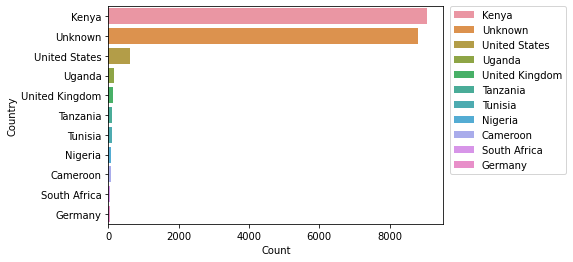

In [ ]:
countries=data['Country'].value_counts()[0:11]
countries = pd.DataFrame(countries)
countries.reset_index(inplace=True)
countries.columns=["Country","Count"]
sns.barplot(x="Count", y="Country", data=countries, hue="Country", dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Retweet Network Analysis

Using the `str.extract()` method in Pandas, we extracted retweets from ***tweet*** column in the ***data*** dataframe, and return a match in a new column we've named ***Retweeted***  otherwise returns NaN.

A retweet is a type of tweet that forwards a message originally posted by someone else.

To do this, we matched the retweet pattern `r'(RT @\w+)'`, which usually starts with "RT @" and is followed by one or more alphanumeric characters.  

In [ ]:
Retweeted=data['tweet'].str.extract(r'(RT @\w+)')
data['Source'] = Retweeted
data['Source'] = data['Source'].apply(lambda x: str(x).replace('RT ', ''))
data.rename(columns={'Source':'source'},inplace=True)

**Cleaning**

We standardized the usernames in the ***source*** and ***target*** columns, by converting all values to lowercase so as to remove inconsistencies in capitalization. This makes it easier to work with. 

For example @MigunaMiguna becomes @migunamiguna

We did this using the `str()` function which converted all values in the ***source*** and ***target*** columns to strings, and then converted all the strings to lowercase using the `lower()` function.

We then used the `apply()` method to apply the `lambda()` function to each value in our converted ***source*** and ***target*** columns.

The resulting output of the apply method is a Pandas series with the same length as the 'source' column, where each value is the lowercase version of the original value in the 'source' column.

In [ ]:
#standardize usernames

data['source'] = data['source'].apply(lambda x: str(x).lower())
data['target'] = data['target'].apply(lambda x: str(x).lower())
#data.source
data.target

0            @keru_ronald
1            @betty_oburu
2        @insomniawarlord
3        @fredric78959307
4            @sonofkisumu
               ...       
19995        @leokenya1_1
19996       @brianneokoth
19997      @kiptoomissile
19998          @bwomoigwa
19999      @hamtoshikamwe
Name: target, Length: 20000, dtype: object

### (`Influencers`) - Top 10 Accounts that were highly retweeted 

In [ ]:
#Top retweeted accounts: The accounts that received the most number of retweets 
data['source'].value_counts()[1:11]

 #sources(accounts) that received more than 90 retweets 
#source=data['source'].value_counts().loc[lambda x: x>90]
#source.shape

@ahmednasirlaw      1958
@migunamiguna       1675
@thriving_luos       854
@citizentvkenya      550
@itsmutai            541
@gabrieloguda        493
@dan_nyagah          439
@nahashonkimemia     394
@mondayomoaigbe      377
@davidkevindw3       311
Name: source, dtype: int64

In [ ]:
#Plot top retweeted accounts
#sns.barplot(x="Retweets", y="target", data=data, hue="target", dodge=False)
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
top_retweeted_accs = list(data['source'].value_counts()[1:12].keys())
_influencers = data[data['target'].isin(top_retweeted_accs)][['target','Twitter Screen Name','Twitter Followers','User Profile Url','Country','Sentiment']]
_influencers.drop_duplicates(subset=['target'],keep='first', inplace=True)

# add count of retweets 
retweet_count = dict(data['source'].value_counts()[1:12])
_influencers['Retweets'] = _influencers['target'].replace(retweet_count)

_influencers = _influencers.sort_values(by=['Retweets'],ascending=False)
_influencers

target      Twitter Screen Name  Twitter Followers  \
4582     @ahmednasirlaw  Ahmednasir Abdullahi SC          1993938.0   
80        @migunamiguna        Dr. Miguna Miguna          2297720.0   
19132    @thriving_luos        DHOLUO DICTIONARY            17206.0   
842     @citizentvkenya         Citizen TV Kenya          4921269.0   
14278         @itsmutai       Lord Abraham Mutai           715137.0   
2853      @gabrieloguda            Gabriel Oguda           518585.0   
5218        @dan_nyagah               Dan Nyagah            64039.0   
1027   @nahashonkimemia         Nahashon Kimemia            94248.0   
5562    @mondayomoaigbe          @mondayomoaigbe             7870.0   
10088    @davidkevindw3              David Kevin             1771.0   
8957        @nyar_asego        Atieno Nyar Asego             7004.0   

                             User Profile Url        Country Sentiment  \
4582     http://www.twitter.com/ahmednasirlaw          Kenya  Negative   
80        http://www.twitter.com/MigunaMiguna        Unknown  Negative   
19132    http://www.twitter.com/Thriving_luos          Kenya  Positive   
842     http://www.twitter.com/citizentvkenya          Kenya   Neutral   
14278         http://www.twitter.com/ItsMutai          Kenya  Negative   
2853      http://www.twitter.com/gabrieloguda          Kenya   Neutral   
5218        http://www.twitter.com/dan_nyagah        Unknown  Negative   
1027   http://www.twitter.com/NahashonKimemia          Kenya  Negative   
5562    http://www.twitter.com/mondayomoaigbe        Unknown  Negative   
10088    http://www.twitter.com/DavidKevinDw3  United States   Neutral   
8957        http://www.twitter.com/nyar_asego          Kenya  Negative   

       Retweets  
4582       1958  
80         1675  
19132       854  
842         550  
14278       541  
2853        493  
5218        439  
1027        394  
5562        377  
10088       311  
8957        261

## **More cleaning**

In [ ]:
# convert all tweets in the DataFrame to lowercase
content_df = data.tweet
content_df.str.lower()
content_df.head()

0                                                                                                  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY
1                                                                                                  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/dt6jEfQruY
2                                                                                                                          QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody
3    @NjiruAdv @rigathi @WilliamsRuto Bitterness will kill this Black Bull @NjiruAdv.

In [ ]:
#split each string into substrings
content_df = content_df.str.split(' ')
content_df.head()

0                                                                                                                   [RT, @julius_muiruri:, Hatupangwingwi., ;, Consumers, will, be, hit, by, an, electricity, price, shock, in, January, 2023, as, the, subsidy, which, retired, president, Uhuru, Kenyatta, initiated, is, dropped., https://t.co/dt6jEfQruY]
1                                                                                                                   [RT, @julius_muiruri:, Hatupangwingwi., ;, Consumers, will, be, hit, by, an, electricity, price, shock, in, January, 2023, as, the, subsidy, which, retired, president, Uhuru, Kenyatta, initiated, is, dropped., https://t.co/dt6jEfQruY]
2                                                                                                                                         [QT, @OmKaYoo:, so?, ;, Twitter, feed, today, is, filled, with, skid, and, ruto, being, horny,, mouth, watering, over, breaking, bad,, or, getting, pissed, at, 

In [ ]:
import string

all_tweets_cleaned = []

for text in content_df:
  text = [x.strip(string.punctuation) for x in text]
  all_tweets_cleaned.append(text)

all_tweets_cleaned[0]
text_tweet = [" ".join(text) for text in all_tweets_cleaned]
final_text_tweet = " ".join(text_tweet)
final_text_tweet


"RT julius_muiruri Hatupangwingwi  Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped https://t.co/dt6jEfQruY RT julius_muiruri Hatupangwingwi  Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped https://t.co/dt6jEfQruY QT OmKaYoo so  Twitter feed today is filled with skid and ruto being horny mouth watering over breaking bad or getting pissed at and threatening to hurt/kill absolutely nobody NjiruAdv rigathi WilliamsRuto Bitterness will kill this Black Bull NjiruAdv What did Riggy G and Samoei son of Ruto ever do to you other than beating your candidates great grandpa RailaOdinga and grandma MarthaKarua hands down Continued barking doesn't add you cleints Actual working does RT julius_muiruri Hatupangwingwi  Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired p

In [ ]:
Tweet_Texts_Cleaned = final_text_tweet.lower()
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned) #remove usernamse
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned) #remove URLs
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned) #remove non-alphabets
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned) #remove words with less than 4 characters
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned) #remove multiple spaces

words_to_remove = ['that', 'used', 'will', 'this', 'with', 'have', 'after', 'they', 'when']
for word in words_to_remove:
    Tweet_Texts_Cleaned = re.sub(r'\b{}\b'.format(word), ' ', Tweet_Texts_Cleaned) # Remove the word surrounded by word boundaries

Tweet_Texts_Cleaned

' julius muiruri hatupangwingwi consumers   electricity price shock january subsidy which retired president uhuru kenyatta initiated dropped julius muiruri hatupangwingwi consumers   electricity price shock january subsidy which retired president uhuru kenyatta initiated dropped omkayoo twitter feed today filled   skid ruto being horny mouth watering over breaking getting pissed threatening hurt kill absolutely nobody njiruadv rigathi williamsruto bitterness   kill   black bull njiruadv what riggy samoei ruto ever other than beating your candidates great grandpa railaodinga grandma marthakarua hands down continued barking doesn cleints actual working does julius muiruri hatupangwingwi consumers   electricity price shock january subsidy which retired president uhuru kenyatta initiated dropped julius muiruri hatupangwingwi consumers   electricity price shock january subsidy which retired president uhuru kenyatta initiated dropped kithinjijoshua truth   kill some amechokapunda wanduta har

### Word cloud

In [ ]:
from collections import Counter


split_it = Tweet_Texts_Cleaned.split()
split_it


resulting_count = Counter(split_it)
# Pass the split_it list to instance of Counter class.
#Counters_found = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = resulting_count.most_common(20)

most_occur

[('kill', 16449),
 ('ruto', 10003),
 ('president', 8685),
 ('uhuru', 7299),
 ('kenyans', 5185),
 ('kenya', 5052),
 ('power', 4359),
 ('raila', 3815),
 ('eliminate', 3473),
 ('kenyatta', 3424),
 ('william', 3326),
 ('government', 2971),
 ('people', 2901),
 ('former', 2799),
 ('know', 2732),
 ('ahmednasirlaw', 2496),
 ('tell', 2456),
 ('killed', 2350),
 ('your', 2345),
 ('think', 2323)]

In [ ]:
most_occur = [tup[0] for tup in most_occur]
most_occur = str(most_occur)

In [ ]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)
 
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(most_occur)

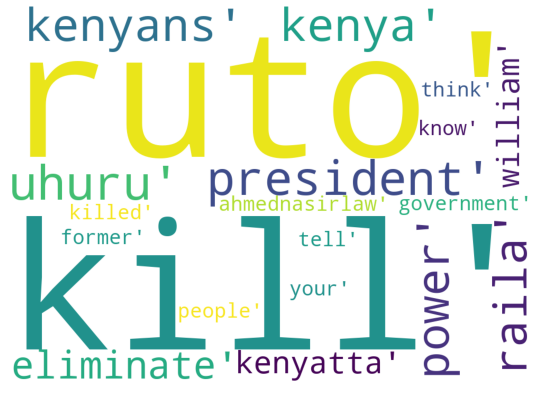

In [ ]:
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

In [ ]:
support_tweets = data[data["tweet"].str.contains("eliminate") == True]
support_tweets = support_tweets.drop_duplicates(subset=['tweet'], keep='first')
support_tweets.head()

Date Headline  \
29   29-Dec-2022 08:48PM      b''   
38   28-Dec-2022 02:43PM      b''   
61   27-Dec-2022 06:31AM      b''   
100  26-Dec-2022 09:45AM      b''   
101  26-Dec-2022 08:14AM      b''   

                                                              URL  \
29   http://twitter.com/arsemayishak/statuses/1608520274567364610   
38    http://twitter.com/tomndirangu/statuses/1608065985822564352   
61   http://twitter.com/AberahmYodit/statuses/1607579945835831296   
100  http://twitter.com/gold_morphat/statuses/1607266387906658304   
101      http://twitter.com/mbachia1/statuses/1607243330009858048   

    Opening Text  \
29           b''   
38           b''   
61           b''   
100          b''   
101          b''   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             tweet  \
29                                                                                           RT @Kahssay8: Hope without swift action are not acceptable for the people of Tigray, #EritreaOutOfTigray must be implement before Issias Afewrkei eliminate the children and elderly. @_AfricanUnion @Europarl_EN @UKParliament @StateDept ; AU peace envoy to Ethiopia, former President Uhuru Kenyatta, expressed hope that all foreign fighters will soon leave #Ethiopia's northern #Tigray region. He made the remarks during a media brief on Thursday. https://t.co/U2BvddKsSR   
38                                                                                                                                                                                                                                                                                                              2022 was a repeat of 1978. In 2002, 41 tribes voted for Kibaki who represented freedom and good governance, while only 1 tribe voted for Uhuru a state backed project. 2027 could be a repeat of 2002, 43 tribes come together to eliminate same vices as in 2002.   
61   RT @Helen287223432: #EritreaOutOfTigray 🗣hope without swift action are not acceptable for the people of Tigray, must be implement before Issias Afewrki eliminate the children and elderly. @_AfricanUnion @Europarl_EN @UKParliament @StateDept @batten_von @DavidAltonHL @UK_FoRBEnvoy @CSWadvocacy @hrw https://t.co/Kbnj6QwUCf ; AU peace envoy to Ethiopia, former President Uhuru Kenyatta, expressed hope that all foreign fighters will soon leave #Ethiopia's northern #Tigray region. He made the remarks during a media brief on Thursday. https://t.co/U2BvddKsSR   
100                                                                                                                                                                                                                                                                                                                              @Mutichilolaw @ciaroyalty if Kenyans State was unable eliminate him or Kenyans Judiciary unable to charge him with Treason Raila Just like Osama Bin Laden would have been a by gone Story long time ago. Not even today but as early in the '80s   
101                                                                                                                                                                                                                                                                                                                           @UDAPartyKe All we need is implement the Uhuru govt projects of dueling MSA,nbi,nku, else, ksm highway. We have e

In [ ]:
#Top retweeted Tweets
pd.options.display.max_colwidth = 200
data['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')[:10]

Tweets  \
0  RT @ahmednasirlaw: When I used to tell Kenyans/world that former President Uhuru's Government used to kill Kenyans as an official governmental policy you used to think I was an alarmist. JACOB JUM...   
1  RT @Thriving_luos: OGINGA TO Raila Odinga IN 1992 ‘’ I named you after my Mother , a good woman, remember three things and hold them , 1- Do not kill for power. I your Father I’m going to the grav...   
2  RT @MigunaMiguna: This is RUBBISH, @MutahiNgunyi. Stop lying. Despot Uhuru Kenyatta tried everything: speaking in his mother tongue, bribery, threats, torture and abductions to impose conman @Rail...   
3  RT @ItsMutai: Najib Balala was bribed with Ksh100million by NGOs to kill 11 rhinos. Some of us called for his resignation. Nothing happened. He called a press conference and literally told me, Lor...   
4                   RT @gabrieloguda: Nandi Senator Samson Cherargei is on my television claiming that maize cartels in the Ruto administration want to kill maize farming in Kenya. Semeni dynasty mbaya.   
5  RT @MigunaMiguna: Despot Uhuru Kenyatta is so desperate to cling to power that he was - and still is - determined to plunge Kenya into civil strife and kill thousands of innocent civilians whose o...   
6  RT @MigunaMiguna: Patriots and Freedom Fighters: Let us make sure we CRIPPLE despot Uhuru Kenyatta POLITICALLY and PERMANENTLY so that he cannot try another attempt to overthrow the WILL of the PE...   
7  RT @DavidKevinDw3: Dear @WilliamsRuto: In what sense of measure you’ve labeled #AbyiAhmed as genius?? Is that: 👉coz he invited foreign force of #Eri🇪🇷to eliminate Tigary ppl? 👉coz he put 7M the pp...   
8  RT @citizentvkenya: Hustlers fund will not be free. It is money to be used for business activities & you will have to repay this money. We will eliminate shylocks & repayment will be less than 10%...   
9  RT @ahmednasirlaw: Kinoti's rein of terror underwritten by H.E Uhuru must be dealt with methodologically and according to the law...knee-jerk reactions to the nefarious activities of a man with a ...   

   counts  
0    1618  
1     854  
2     551  
3     541  
4     493  
5     489  
6     427  
7     311  
8     294  
9     254

### (`Amplifyers`) - Top Accounts that retweeted most of the tweets in the network 

This section tries to identify the key influencers within the twitter data by extracting the unique accounts and counting the total number of retweets from these accounts. The aim is to understand who amplified most of the tweets or narratives.

In [ ]:
#Extracting the Retweet network. Get only retweets from the dataset and add them to RT
RT = data[data['tweet'].str.startswith("RT", na=False)]
RT.shape

(14982, 37)

In [ ]:
#target is person retweeting
RT.head()

Date Headline  \
0   31-Dec-2022 08:09PM      b''   
1   31-Dec-2022 06:36PM      b''   
4   31-Dec-2022 03:57PM      b''   
5   31-Dec-2022 02:19PM      b''   
18  30-Dec-2022 02:02PM      b''   

                                                            URL Opening Text  \
0   http://twitter.com/keru_ronald/statuses/1609235304036331520          b''   
1   http://twitter.com/betty_oburu/statuses/1609211976554618881          b''   
4   http://twitter.com/SonOfKisumu/statuses/1609171828928544768          b''   
5       http://twitter.com/JM_CODE/statuses/1609147102705098754          b''   
18    http://twitter.com/p_rangoro/statuses/1608780540953636864          b''   

                                                                                                                                                                                                      tweet  \
0   RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
1   RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
4   RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
5   RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
18    RT @OwidiOdoyo: If you laugh when God is disrespected or insulted but froth in the mouth and is ready to kill when Raila is told the truth, then know you are a cult member. Seek help. Seek way out.   

             source        target  Country Subregion Language  ...  \
0   @julius_muiruri  @keru_ronald  Unknown       b''  English  ...   
1   @julius_muiruri  @betty_oburu    Kenya       b''  English  ...   
4   @julius_muiruri  @sonofkisumu    Kenya       b''  English  ...   
5   @julius_muiruri      @jm_code  Unknown       b''  English  ...   
18      @owidiodoyo    @p_rangoro  Unknown       b''  English  ...   

       Twitter Screen Name                    User Profile Url  \
0                 Rk Ronny  http://www.twitter.com/keru_ronald   
1              Betty Oburu  http://www.twitter.com/betty_oburu   
4   #BallotOrBullet 🇰🇪🇰🇪🇰🇪  http://www.twitter.com/SonOfKisumu   
5                       JM      http://www.twitter.com/JM_CODE   
18            Paul Rangoro    http://www.twitter.com/p_rangoro   

                                                                                                                                                    Twitter Bio  \
0                                                                                                                A just leader is better than abundance of rain   
1   An enthusiastic mother,an avid reader , a  fan of local and international  football, a lover of nature, keeps abreast with global issues and current trends   
4                                    1 Chronicles 29:15\n\nFor we are strangers before them, and sojourners, as were all our fathers.\n\n#ChelseaFC #GorMahiaFC   
5                                                                                                                                                                 
18                                                                                                                                                                

   Twitter Followers Twitter Following Alternate Date Format     Time  \
0              295.0             898.0          Dec 31, 2022  8:09 PM   
1             1369.0            1339.0          Dec 31, 2022  6:36 PM   
4             1318.0            1467.0          Dec 31, 2022  

In [ ]:
#get the number of unique accounts retweeting
RT['target'].nunique()

9254

In [ ]:
#Filtering the top 10 unique accounts that retweeted content
rt_10 = RT['target'].value_counts()[:10]
rt_10.head(10)

@presenterbarac1    34
@trottoirradio      27
@makokhadr          26
@josphat76095435    26
@billowismail       25
@cde_sbm            25
@ednamu2            22
@daview_k           21
@princegideon01     21
@kiundu_king        21
Name: target, dtype: int64

<AxesSubplot:>

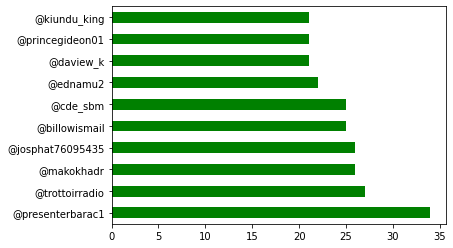

In [ ]:
rt_10[:10].plot(kind='barh',color='green')

In [ ]:
top_spreaders = list(RT['target'].value_counts()[:10].keys())
_spreaders = RT[RT['target'].isin(top_spreaders)][['target','Twitter Screen Name','Twitter Followers','User Profile Url']]
_spreaders.drop_duplicates(subset=['target'],keep='first', inplace=True)
# add retweet_count
retweets = dict(RT['target'].value_counts()[:10])
_spreaders['retweeted'] = _spreaders['target'].replace(retweets)
_spreaders.sort_values(by=['retweeted'],ascending=False)

target           Twitter Screen Name  Twitter Followers  \
608   @presenterbarac1              Presenter Barack             3102.0   
1516    @trottoirradio                 Medianalystar            17963.0   
1301        @makokhadr                    Informer..             1538.0   
2937  @josphat76095435                    varis papa              744.0   
62       @billowismail               Yussuf B Ismail             5940.0   
2118          @cde_sbm                           SBM             1970.0   
1005          @ednamu2                       edna mu              496.0   
795       @kiundu_king                King ♔ Bossman              979.0   
1325         @daview_k                         Davis             5725.0   
3602   @princegideon01  P r i n c e _ G i d e o n 🇰🇪              237.0   

                            User Profile Url  retweeted  
608   http://www.twitter.com/PresenterBarac1         34  
1516    http://www.twitter.com/TrottoirRadio         27  
1301        http://www.twitter.com/MakokhaDr         26  
2937  http://www.twitter.com/josphat76095435         26  
62       http://www.twitter.com/BillowIsmail         25  
2118          http://www.twitter.com/Cde_SBM         25  
1005          http://www.twitter.com/ednamu2         22  
795       http://www.twitter.com/kiundu_king         21  
1325         http://www.twitter.com/DaView_k         21  
3602   http://www.twitter.com/PrinceGideon01         21

### (`Seeders`) - Top Accounts that posted original tweets in the network 


This section identifies the key accounts that posted original tweets. The aim is to understand who created most of the tweets or narratives.

In [ ]:
#get original data
No_Retweets=data[data['tweet'].str.contains('RT')== False]
original=No_Retweets[~No_Retweets['tweet'].str.contains('QT')]
original.shape

(3477, 37)

In [ ]:
original['target'].nunique()

2599

In [ ]:
#Top accounts that tweeted the most original tweets
original['target'].value_counts()[:10]

@nguthudennis       44
@lloyd45478399      27
@danielmagita       22
@vuma_trends        15
@saidimusalim1      15
@sholla_saddam      14
@bazengaake         14
@v_katama           14
@sharpsh05380877    13
@oshunmumbi         12
Name: target, dtype: int64

In [ ]:
#accounts that tweeted more than 1 original tweets
OR_tweet=original['target'].value_counts().loc[lambda x: x>1]
OR_tweet.shape

(383,)

In [ ]:
#details of seeders
top_seeder_accs = list(original['target'].value_counts()[:10].keys())
tweets = dict(original['target'].value_counts()[:10])
_seeders = data[data['target'].isin(top_seeder_accs)][['target','Twitter Screen Name','Twitter Followers','User Profile Url']]
_seeders.drop_duplicates(subset=['target'],keep='first', inplace=True)
_seeders['tweets_posted' ] = _seeders['target'].replace(tweets)
_seeders.sort_values(by=['tweets_posted'],ascending=False)

target     Twitter Screen Name  Twitter Followers  \
34       @nguthudennis           Atalanta BAIB             1354.0   
245     @lloyd45478399              Baba Mboga              280.0   
682      @danielmagita           Daniel Magita               32.0   
31      @saidimusalim1  Saidimu Saidimu 🇰🇪🇺🇬🇹🇿             1097.0   
1382      @vuma_trends             VUMA TRENDS             4489.0   
641     @sholla_saddam                  Sholla             4891.0   
3138       @bazengaake                 Bazenga             2305.0   
6131         @v_katama        Katama V. Naibei             1223.0   
21    @sharpsh05380877           Sharp Shooter              154.0   
3413       @oshunmumbi                  Akinyi               92.0   

                            User Profile Url  tweets_posted  
34       http://www.twitter.com/NguthuDennis             44  
245     http://www.twitter.com/Lloyd45478399             27  
682      http://www.twitter.com/DanielMagita             22  
31      http://www.twitter.com/saidimusalim1             15  
1382      http://www.twitter.com/vuma_trends             15  
641     http://www.twitter.com/sholla_saddam             14  
3138       http://www.twitter.com/BazengaaKE             14  
6131         http://www.twitter.com/V_katama             14  
21    http://www.twitter.com/SharpSh05380877             13  
3413       http://www.twitter.com/OshunMumbi             12

### Top Accounts that posted quoted tweets in the network


This section tries to identify the key influencers within the twitter data by extracting the unique accounts and counting the total number of quoted tweets from these accounts. The aim is to understand who amplified most of the tweets or narratives through quotes.

In [ ]:
Q = data[data['tweet'].str.startswith("QT", na=False)]
Q.shape

(1526, 37)

In [ ]:
Q['target'].nunique()

1266

In [ ]:
Q['target'].value_counts()

@manric540          14
@madametrois        12
@jaeconomics         7
@keru_ronald         7
@beatric06754363     6
                    ..
@007shujaa           1
@mtukoo              1
@okoregeorge669      1
@jacksamie8          1
@brianneokoth        1
Name: target, Length: 1266, dtype: int64

## Archive Gephi Ready file

In [ ]:
data_expo = data[data['source'] != 'nan'].reset_index(drop=True)
data_expo.index = data_expo.index.set_names(['Index'])
data_expo = data_expo.rename(columns={'source':'Source',
                          'target':'Target'})
data_expo.to_csv('/content/drive/MyDrive/Module 5/M5_TUDA_Dr Senagi/gephi.csv') # update to corresponding folder

In [ ]:
data[:3]

Date Headline  \
0  31-Dec-2022 08:09PM      b''   
1  31-Dec-2022 06:36PM      b''   
2  31-Dec-2022 06:15PM      b''   

                                                               URL  \
0      http://twitter.com/keru_ronald/statuses/1609235304036331520   
1      http://twitter.com/betty_oburu/statuses/1609211976554618881   
2  http://twitter.com/insomniawarlord/statuses/1609206603395497985   

  Opening Text  \
0          b''   
1          b''   
2          b''   

                                                                                                                                                                                                     tweet  \
0  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
1  RT @julius_muiruri: Hatupangwingwi. ; Consumers will be hit by an electricity price shock in January 2023 as the subsidy which retired president Uhuru Kenyatta initiated is dropped. https://t.co/d...   
2                    QT @OmKaYoo: so? ; Twitter feed today is filled with skid and ruto being horny, mouth watering over breaking bad, or getting pissed at and threatening to hurt/kill absolutely nobody   

            source            target  Country Subregion Language  ...  \
0  @julius_muiruri      @keru_ronald  Unknown       b''  English  ...   
1  @julius_muiruri      @betty_oburu    Kenya       b''  English  ...   
2              nan  @insomniawarlord  Unknown       b''  English  ...   

   Twitter Screen Name                        User Profile Url  \
0             Rk Ronny      http://www.twitter.com/keru_ronald   
1          Betty Oburu      http://www.twitter.com/betty_oburu   
2                  a !  http://www.twitter.com/insomniawarlord   

                                                                                                                                                   Twitter Bio  \
0                                                                                                               A just leader is better than abundance of rain   
1  An enthusiastic mother,an avid reader , a  fan of local and international  football, a lover of nature, keeps abreast with global issues and current trends   
2                                                                                          this man is carnage, a man who has given up everything but fighting   

  Twitter Followers Twitter Following Alternate Date Format     Time  \
0             295.0             898.0          Dec 31, 2022  8:09 PM   
1            1369.0            1339.0          Dec 31, 2022  6:36 PM   
2              44.0              64.0          Dec 31, 2022  6:15 PM   

          State     City Document Tags  
0                                  b''  
1  Nairobi Area  Nairobi           b''  
2                                  b''  

[3 rows x 37 columns]

## NLP